# 2D Kinematic hardening

This notebook compares the response of the series and parallel kinematic hardening model in 2D. Both the rate independent and the rate dependent versions of the models are implemented - both give the same response as the viscosity parameter $\mu$ approaches zero. 

For background, read:

Beuckelaers W.J.A.P, Houlsby G.T and Burd H.J. (2018) _A comparison of the series and parallel kinematic hardening model in 2D_ In proceedings of the NUMGE Conference, Porto

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')

In [2]:
from discretise_kinematic_hardening import discretise_kinematic_hardening_parallel
from discretise_kinematic_hardening import discretise_kinematic_hardening_series

from kinematic_hardening_2D import macaulay, series_kinematic_hardening, series_kinematic_hardening_viscous, parallel_kinematic_hardening, parallel_kinematic_hardening_viscous

In [3]:
# Define the applied stress history
sigma_max_abs_1 = 0.3
sigma_max_abs_2 = 0.6

d_sigma = 0.00101

increment_zero_one = np.arange(0, 1, d_sigma)
increment_one_one = np.arange(-1, 1, d_sigma)
constant_zero_one = 0*increment_zero_one
constant_one_one = 0*increment_one_one

sigma_x_loop_1 = sigma_max_abs_1 * np.append(np.append(np.append(np.append(increment_zero_one, 1 + constant_zero_one), np.flipud(increment_one_one)),-1+constant_one_one), -np.flipud(increment_one_one))
sigma_y_loop_1 = sigma_max_abs_1 * np.append(np.append(np.append(np.append(constant_zero_one, increment_zero_one), 1 + constant_one_one), np.flipud(increment_one_one)),-1+constant_one_one)

sigma_x_loop_2 = np.append(np.append(np.append(np.append(sigma_max_abs_1 + (sigma_max_abs_2 - sigma_max_abs_1) * increment_zero_one, sigma_max_abs_2 + constant_zero_one), sigma_max_abs_2 * np.flipud(increment_one_one)), -sigma_max_abs_2 + constant_one_one), sigma_max_abs_2 * increment_one_one) 
sigma_y_loop_2 = np.append(np.append(np.append(np.append(-sigma_max_abs_1 + constant_zero_one, -sigma_max_abs_1 + (sigma_max_abs_2 + sigma_max_abs_1) * increment_zero_one), sigma_max_abs_2 + constant_one_one), -sigma_max_abs_2 * increment_one_one), -sigma_max_abs_2 + constant_one_one)

sigma_x_history = np.append(sigma_x_loop_1, sigma_x_loop_2)
sigma_y_history = np.append(sigma_y_loop_1, sigma_y_loop_2)

<IPython.core.display.Javascript object>


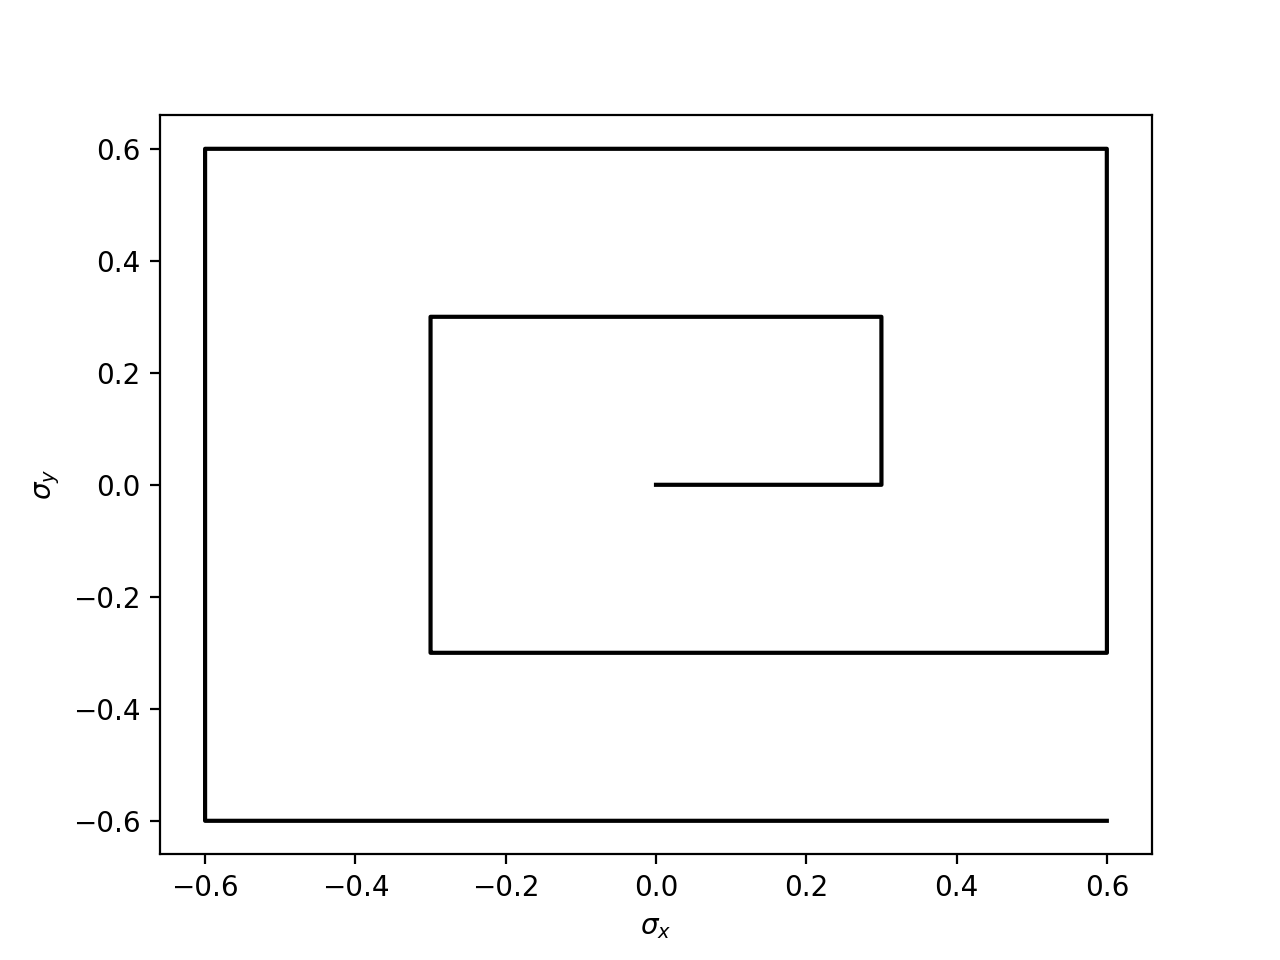

Text(0,0.5,'$\\sigma_y$')

In [11]:
plt.figure(1)

plt.plot(sigma_x_history, sigma_y_history, '-k')

plt.xlabel('$\sigma_x$')
plt.ylabel('$\sigma_y$')

In [5]:
# Define the backbone curve and calculate the parameters for the series and kinematic hardening model
nk = 20

n = 0.5
k = 1
eu = 10
su = 1

sigma_backbone = su * (np.arange(0,1,1/nk) + 1/nk)

a = n
b = -k*sigma_backbone/su**2+k*n*sigma_backbone/su**2+k/su-k*n/su+2*n*sigma_backbone/(eu*su)
c=-(sigma_backbone**2/su**2-2*n*sigma_backbone**2/su**2-sigma_backbone/su+n*sigma_backbone/su)/eu**2;
D = macaulay(b**2-4*a*c)

epsilon_backbone = -eu**2*(-b+(D)**(0.5))/(2*a)

k_n_p, H_n_p = discretise_kinematic_hardening_parallel(sigma_backbone, epsilon_backbone)
k_n_s, H_n_s, E_s = discretise_kinematic_hardening_series(sigma_backbone, epsilon_backbone)

In [6]:
epsilon_x_history_s, epsilon_y_history_s = series_kinematic_hardening(k_n_s, H_n_s, E_s, sigma_x_history, sigma_y_history)
epsilon_x_history_p, epsilon_y_history_p = parallel_kinematic_hardening(k_n_p, H_n_p, sigma_x_history, sigma_y_history)

# Viscous simulations
epsilon_x_history_vs, epsilon_y_history_vs = series_kinematic_hardening_viscous(k_n_s, H_n_s, E_s, mu=4, dt=1, sigma_x_history=sigma_x_history, sigma_y_history=sigma_y_history)
epsilon_x_history_vp, epsilon_y_history_vp = parallel_kinematic_hardening_viscous(k_n_p, H_n_p, mu=0.02, dt=1, sigma_x_history=sigma_x_history, sigma_y_history=sigma_y_history)

<IPython.core.display.Javascript object>


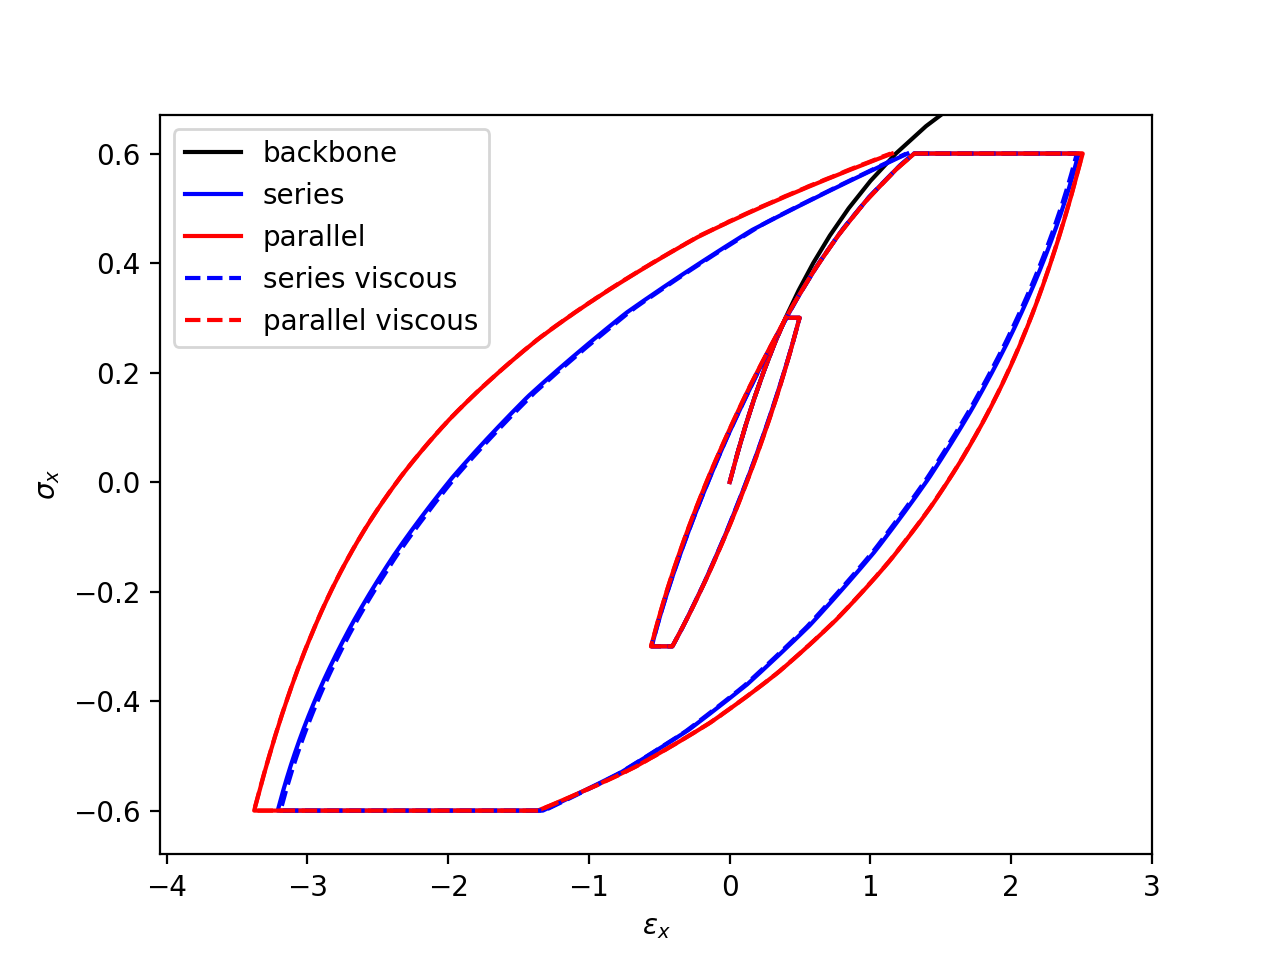

In [12]:
plt.figure(2)

plt.plot(epsilon_backbone, sigma_backbone, '-k', label='backbone')

plt.plot(epsilon_x_history_s, sigma_x_history, '-b', label='series')
plt.plot(epsilon_x_history_p, sigma_x_history, '-r', label='parallel')
plt.plot(epsilon_x_history_vs, sigma_x_history, '--b', label='series viscous')
plt.plot(epsilon_x_history_vp, sigma_x_history, '--r', label='parallel viscous')

plt.xlim(xmax=3)
plt.ylim(ymax=0.67)

plt.xlabel('$\epsilon_x$')
plt.ylabel('$\sigma_x$')
plt.legend()

<IPython.core.display.Javascript object>


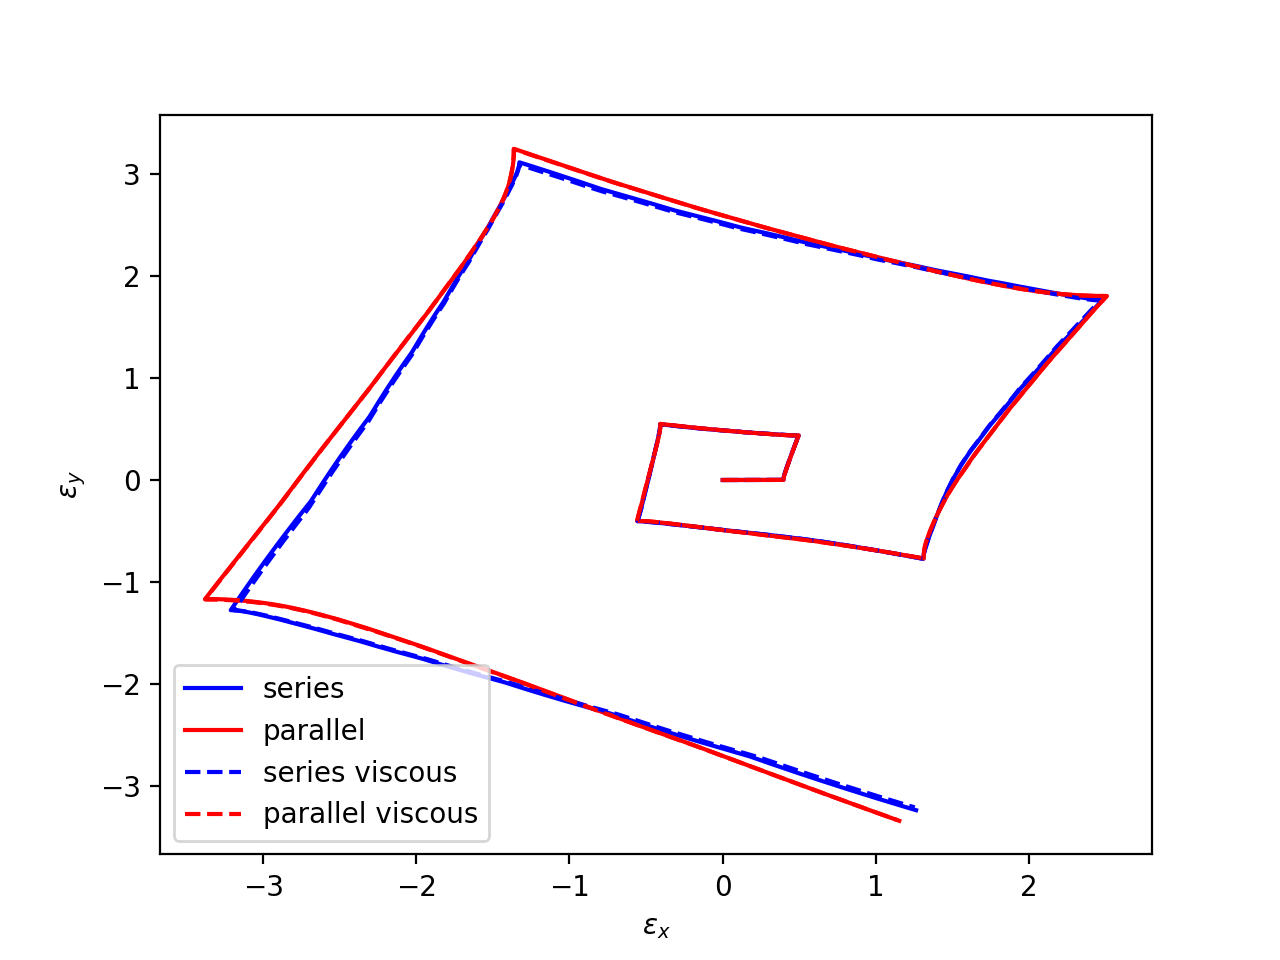

In [8]:
plt.figure(3)

plt.plot(epsilon_x_history_s, epsilon_y_history_s, '-b', label='series')
plt.plot(epsilon_x_history_p, epsilon_y_history_p, '-r', label='parallel')
plt.plot(epsilon_x_history_vs, epsilon_y_history_vs, '--b', label='series viscous')
plt.plot(epsilon_x_history_vp, epsilon_y_history_vp, '--r', label='parallel viscous')

plt.xlabel('$\epsilon_x$')
plt.ylabel('$\epsilon_y$')
plt.legend()